<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce travail est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par quatre systèmes : NLTK, spaCy (deux modèles, 'en_core_web_sm' et 'en_core_web_lg'), et DistilBERT/NER.  Les données de test en anglais vous sont fournies sur Cyberlearn au format CoNLL.  Pour comparer les systèmes, on utilise la macro-moyenne des scores f1 pour chaque étiquette.  Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [1]:
import spacy
from spacy.tokens import Doc

In [2]:
# !python -m spacy download en_core_web_sm 
# exécuter la ligne ci-dessus une fois, si nécessaire, idem pour en_core_web_lg

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament." 

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [5]:
doc = nlp(raw_text)
formatted_tokens = " ".join([f"{token.text} [{token.label_}]" for token in doc.ents])
print(formatted_tokens)

Reinhold Messner [ORG] Mount Everest [LOC] the European Parliament [ORG]


**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* de `raw_text` (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

In [6]:
import nltk
# nltk.download('maxent_ne_chunker_tab') 
# nltk.download('words') 
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_eng')

tokens = nltk.word_tokenize(raw_text)
tagged = nltk.pos_tag(tokens)
ne_chunked = nltk.ne_chunk(tagged)

print("Résultat du NE chunking :")
print(ne_chunked)
print("\nType du résultat :", type(ne_chunked))

Résultat du NE chunking :
(S
  (PERSON Reinhold/NNP)
  (PERSON Messner/NNP)
  made/VBD
  a/DT
  solo/JJ
  ascent/NN
  of/IN
  (PERSON Mount/NNP Everest/NNP)
  and/CC
  was/VBD
  later/RB
  a/DT
  member/NN
  of/IN
  the/DT
  (ORGANIZATION European/NNP Parliament/NNP)
  ./.)

Type du résultat : <class 'nltk.tree.tree.Tree'>


**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle `for`, et déterminer si un noeud possède une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [7]:
for ne in ne_chunked:
    if hasattr(ne, 'label'):
        print(ne)

(PERSON Reinhold/NNP)
(PERSON Messner/NNP)
(PERSON Mount/NNP Everest/NNP)
(ORGANIZATION European/NNP Parliament/NNP)


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

In [8]:
# C'est pas terrible car il lablise "Mount Everest" comme étant une EN de type "PERSON", 
# de plus il distingue "Reinhold" et "Messner" comme étant 2 entités séparées.

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

Chaque ligne représente un mot du texte, avec des colonnes séparées par un espace. Les phrases sont séparées par une ligne vide. Les documents peuvent commencer par une ligne spéciale : -DOCSTART- -X- O O qui marque le début d'un document.

Les colonnes sont:
1. Mot/token du texte
2. POS tag (catégorie grammaticale) selon Penn Treebank
3. Tag de chunking syntaxique (groupe de mots)
4. Tag d'entité nommée (NER)

Les tags NE suivent le schéma BIO :
* B-TYPE = début d’une entité nommée de type TYPE
* I-TYPE = à l’intérieur d’une entité nommée de type TYPE
* O = pas une entité nommée

**2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les quatre premières phrases, accessibles via la méthode `.iob_sents()`.

In [9]:
from nltk.corpus.reader.conll import ConllCorpusReader

In [10]:

reader = ConllCorpusReader("", "eng.test.a.conll", ['words', 'pos', 'ignore','chunk'])
for i in range(1,5) :
    print(reader.iob_sents()[i])


[('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'I-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
[('LONDON', 'NNP', 'I-LOC'), ('1996-08-30', 'CD', 'O')]
[('West', 'NNP', 'I-MISC'), ('Indian', 'NNP', 'I-MISC'), ('all-rounder', 'NN', 'O'), ('Phil', 'NNP', 'I-PER'), ('Simmons', 'NNP', 'I-PER'), ('took', 'VBD', 'O'), ('four', 'CD', 'O'), ('for', 'IN', 'O'), ('38', 'CD', 'O'), ('on', 'IN', 'O'), ('Friday', 'NNP', 'O'), ('as', 'IN', 'O'), ('Leicestershire', 'NNP', 'I-ORG'), ('beat', 'VBD', 'O'), ('Somerset', 'NNP', 'I-ORG'), ('by', 'IN', 'O'), ('an', 'DT', 'O'), ('innings', 'NN', 'O'), ('and', 'CC', 'O'), ('39', 'CD', 'O'), ('runs', 'NNS', 'O'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('over', 'IN', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), ('head', 'NN', 'O'), ('of', 'IN', 'O

**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra tous les tags NE en une seule liste (en vue de l'évaluation)

In [11]:
sentences = reader.iob_sents()
test_tokens = []
test_tags = []

for sent in sentences:
    if len(sent) >= 3:
        tokens = [word for word, pos, ne in sent]
        tags = [ne for word, pos, ne in sent]
        
        test_tokens.append(tokens)
        test_tags.extend(tags)
        
print("Exemple test_tokens[0] :", test_tokens[:])
print("Exemple test_tags[:10] :", test_tags[:len(test_tokens)])

Exemple test_tokens[0] : [['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.'], ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.'], ['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.'], ['After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'Engl

**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [12]:
print("test_tags: ", len(test_tags), " tags")
 
from collections import Counter
print(f"Occurences de chaque type de tags: {Counter(test_tags)}")
 
print("test_tokens: ", len(test_tokens), " phrases")

test_tags:  50817  tags
Occurences de chaque type de tags: Counter({'O': 42474, 'I-PER': 3097, 'I-ORG': 2080, 'I-LOC': 1938, 'I-MISC': 1228})
test_tokens:  2970  phrases


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertit chaque tag du NER de NLTK vers le tag correspondant pour les données de test. 

In [13]:
def convert_nltk_conll(nltk_tag):
    corresp = {
        'O': 'O',
        'ORGANIZATION': 'I-ORG',
        'PERSON': 'I-PER',
        'LOCATION': 'I-LOC',
        'GPE': 'I-LOC',
        'GSP': 'I-MISC',
        'FACILITY': 'I-LOC',
        'MISC': 'I-MISC',
    }
    if nltk_tag in corresp:
        return corresp[nltk_tag]
    else:
        print(f"Tag inconnu: {nltk_tag}")
    return 'I-MISC'

**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [14]:
from nltk import pos_tag, ne_chunk_sents

# POS-taguer toutes les phrases d'un coup
pos_tagged_sents = [pos_tag(sent) for sent in test_tokens]

# NER chunking de toutes les phrases
chunked_sents = ne_chunk_sents(pos_tagged_sents)

# Extraction des tags dans nltk_tags
nltk_tags = []

for tree in chunked_sents:
    for subtree in tree:
        if hasattr(subtree, 'label'):
            for _ in subtree:
                nltk_tags.append(subtree.label())
        else:
            nltk_tags.append('O')

**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [15]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

print("Nombre total de tags :", len(nltk_tags_conv))
print("Les 10 premiers tags convertis :", nltk_tags_conv[:10])

Nombre total de tags : 50817
Les 10 premiers tags convertis : ['I-LOC', 'O', 'I-ORG', 'O', 'O', 'O', 'I-ORG', 'O', 'I-ORG', 'O']


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

Rapport de classification NER (format CoNLL, avec conversion):
              precision    recall  f1-score   support

       I-LOC       0.55      0.72      0.62      1938
      I-MISC       0.16      0.01      0.01      1228
       I-ORG       0.51      0.35      0.41      2080
       I-PER       0.77      0.74      0.76      3097
           O       0.96      0.99      0.97     42474

    accuracy                           0.91     50817
   macro avg       0.59      0.56      0.56     50817
weighted avg       0.89      0.91      0.90     50817



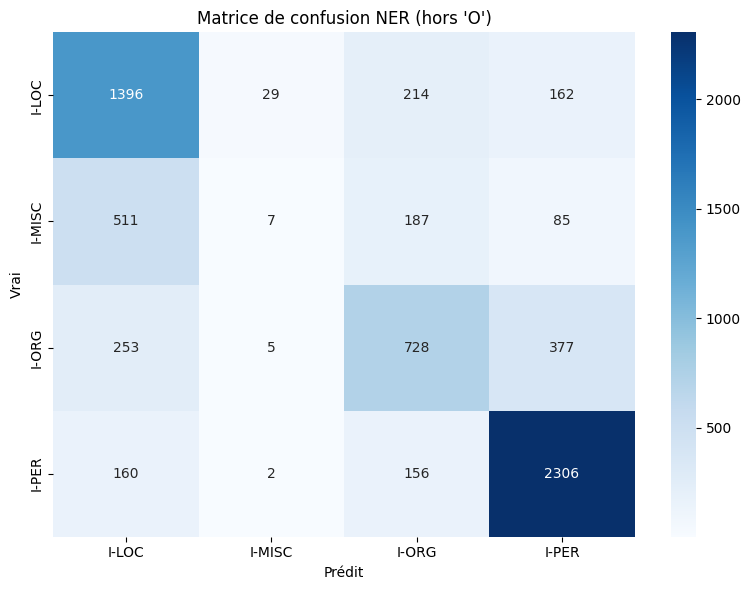

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification des longueurs
assert len(test_tags) == len(nltk_tags_conv), "Longueurs différentes entre les tags réels et prédits."

# Rapport de classification
print("Rapport de classification NER (format CoNLL, avec conversion):")
print(classification_report(test_tags, nltk_tags_conv))

# Matrice de confusion
labels = sorted(set(test_tags) - {'O'})
conf_mat = confusion_matrix(test_tags, nltk_tags_conv, labels=labels)

# Affichage de la matrice de confusion
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion NER (hors 'O')")
plt.tight_layout()
plt.show()


## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [17]:
def convert_spacy_conll(spacy_tag):
    corresp = {
        'O': 'O',
        'PERSON': 'I-PER',
        'ORG': 'I-ORG',
        'GPE': 'I-LOC',
        'LOC': 'I-LOC',
        'FAC': 'I-LOC',
        'NORP': 'I-MISC',
        'PRODUCT': 'I-MISC',
        'EVENT': 'I-MISC',
        'WORK_OF_ART': 'I-MISC',
        'LAW': 'I-MISC',
        'LANGUAGE': 'O',
        'DATE': 'O',
        'TIME': 'O',
        'PERCENT': 'O',
        'MONEY': 'O',
        'QUANTITY': 'O',
        'ORDINAL': 'O',
        'CARDINAL': 'O'
    }
    if spacy_tag in corresp:
        return corresp[spacy_tag]
    else:
        print(f"Tag inconnu: {spacy_tag}")
    return 'I-MISC'

**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

In [18]:
spacy_tags = []

for sentence in test_tokens:
    # Création manuelle d'un Doc avec les tokens déjà définis
    doc = Doc(nlp.vocab, words=sentence)
    # Appliquer le pipeline NER sur le Doc
    doc = nlp(doc)
    
    # Associer chaque token à son entité, ou 'O' s'il n'en a pas
    for token in doc:
        if token.ent_type_:
            spacy_tags.append(token.ent_type_)
        else:
            spacy_tags.append('O')

**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [19]:
spacy_tags_conv = [convert_spacy_conll(tag) for tag in spacy_tags]

print("Nombre total de tags :", len(spacy_tags_conv))
print("Les 10 premiers tags convertis :", spacy_tags_conv[:10])


Nombre total de tags : 50817
Les 10 premiers tags convertis : ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

              precision    recall  f1-score   support

       I-LOC       0.79      0.80      0.80      1938
      I-MISC       0.70      0.61      0.65      1228
       I-ORG       0.52      0.52      0.52      2080
       I-PER       0.83      0.71      0.77      3097
           O       0.97      0.98      0.97     42474

    accuracy                           0.93     50817
   macro avg       0.76      0.73      0.74     50817
weighted avg       0.93      0.93      0.93     50817



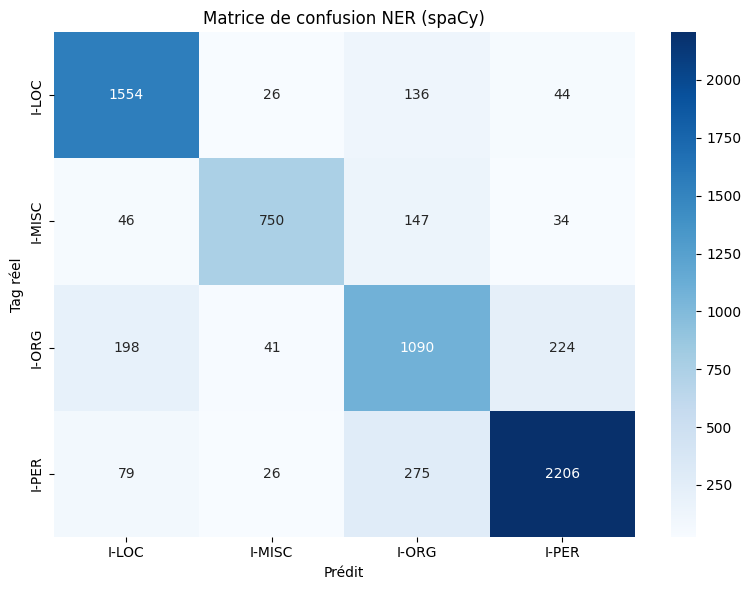

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Rapport
print(classification_report(test_tags, spacy_tags_conv))

# Matrice de confusion (sans 'O')
labels = sorted(set(test_tags) - {'O'})
cm = confusion_matrix(test_tags, spacy_tags_conv, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Tag réel")
plt.title("Matrice de confusion NER (spaCy)")
plt.tight_layout()
plt.show()

**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (il n'est pas demander d'afficher la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [21]:
# !python -m spacy download en_core_web_lg

# Charger le modèle large
nlp2 = spacy.load("en_core_web_lg")

spacy_tags_lg = []

for sentence in test_tokens:
    doc = Doc(nlp2.vocab, words=sentence)
    doc = nlp2(doc)
    
    for token in doc:
        spacy_tags_lg.append(token.ent_type_ if token.ent_type_ else 'O')

# Conversion
spacy_tags_conv_lg = [convert_spacy_conll(tag) for tag in spacy_tags_lg]

# Évaluation
print(classification_report(test_tags, spacy_tags_conv_lg))


              precision    recall  f1-score   support

       I-LOC       0.75      0.87      0.81      1938
      I-MISC       0.84      0.66      0.74      1228
       I-ORG       0.55      0.60      0.58      2080
       I-PER       0.91      0.82      0.86      3097
           O       0.98      0.98      0.98     42474

    accuracy                           0.94     50817
   macro avg       0.81      0.79      0.79     50817
weighted avg       0.94      0.94      0.94     50817



## 5. Utilisation d'embeddings contextualisés fournis par BERT

Dans cette section, vous allez évaluer un modèle basé sur le Transformer, qui fournit des embeddings contextualisés pour chaque token.  Ces embeddings sont ensuite utilisés par une couche finale (appelée _NER head_) pour assigner à chaque token une étiquette indiquant les entités nommées.  Le modèle et les instructions pour l'utiliser sont disponibles ici : https://huggingface.co/dslim/distilbert-NER (il s'agit d'une version de BERT "distillée" dans un modèle plus léger, suivi du _NER head_).

**5a.** Prise en main du modèle : à l'aide des exemples fournis sur Hugging Face, veuillez appliquer DistilBERT_NER sur les 3 premières phrases des données contenues dans `test_tokens` (voir le point 2c) et afficher les résultats obtenus.  Quelles sont les différences avec les résultats de NLTK et de spaCy ?

In [40]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Charger le modèle distilbert-NER
tokenizer = AutoTokenizer.from_pretrained("dslim/distilbert-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/distilbert-NER")

KeyboardInterrupt: 

In [ ]:
# Créer un pipeline NER
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

# Prendre les 3 premières phrases
first_sentences = test_tokens[:3]

# Appliquer le pipeline sur chaque phrase
for idx, sentence in enumerate(first_sentences):
    # Attention: BERT attend une string, donc on "recolle" les tokens
    text = " ".join(sentence)
    
    ner_results = ner_pipeline(text)
    
    print(f"\nRésultats pour la phrase {idx+1}:")
    for entity in ner_results:
        print(entity)



Device set to use cpu



Résultats pour la phrase 1:
{'entity': 'B-PER', 'score': np.float32(0.7077919), 'index': 6, 'word': 'L', 'start': 10, 'end': 11}
{'entity': 'B-PER', 'score': np.float32(0.6600714), 'index': 7, 'word': '##EI', 'start': 11, 'end': 13}
{'entity': 'B-PER', 'score': np.float32(0.630905), 'index': 8, 'word': '##CE', 'start': 13, 'end': 15}
{'entity': 'B-PER', 'score': np.float32(0.7143564), 'index': 9, 'word': '##ST', 'start': 15, 'end': 17}
{'entity': 'B-PER', 'score': np.float32(0.7178323), 'index': 10, 'word': '##ER', 'start': 17, 'end': 19}
{'entity': 'B-PER', 'score': np.float32(0.8095983), 'index': 11, 'word': '##S', 'start': 19, 'end': 20}
{'entity': 'B-PER', 'score': np.float32(0.45343268), 'index': 12, 'word': '##H', 'start': 20, 'end': 21}
{'entity': 'B-PER', 'score': np.float32(0.7269432), 'index': 13, 'word': '##IR', 'start': 21, 'end': 23}
{'entity': 'B-PER', 'score': np.float32(0.76244396), 'index': 14, 'word': '##E', 'start': 23, 'end': 24}

Résultats pour la phrase 2:
{'enti

BERT a détecté LEICESTERSHIRE mais en plusieurs sous-tokens avec une erreur de type (PER au lieu de ORG). spaCy a correctement reconnu LEICESTERSHIRE comme une organisation (I-ORG) avec une annotation directe par mot. NLTK est capable de détecter certaines entités sur des phrases simples mais n'a pas été testé sur les memes phrases.

**5b.** Le modèle DistilBERT utilise son propre tokeniseur, c'est pourquoi les étiquettes indiquant les entités nommées sont parfois portées par plusieurs *subwords* composant un mot.  Il faut donc parfois agréger une liste d'étiquettes en une seule.  

Veuillez écrire une fonction qui prend en entrée une liste d'étiquettes et retourne une seule étiquette : soit la première, soit celle qui est majoritaire.  Cette fonction sera utilisée plus loin.

In [ ]:
from collections import Counter

def tag_fusion(tag_list, method='first'):  # method='first' ou 'majority'
    if not tag_list:  # si liste vide
        return 'O'
    if method == 'first':
        return tag_list[0]
    elif method == 'majority':
        counter = Counter(tag_list)
        # On choisit l'étiquette la plus fréquente
        return counter.most_common(1)[0][0]
    else:
        return 'error'


print(tag_fusion(['O', 'B-PER', 'B-PER'], method='first'))

O


**5c.** Veuillez afficher le `set` des tags apparaissant dans les résultats de DistilBERT_NER sur les 50 premières phrases du corpus. Comment se comparent-ils aux tags des données de test CoNLL ?

In [ ]:
# Collecter tous les tags trouvés
bert_tags = []

for i in range(50):
    text = ner_pipeline(' '.join(test_tokens[i]))
    bert_tags += [tag['entity'] for tag in text]


# Affichage
print("Tags rencontrés avec DistilBERT_NER :", set(bert_tags))


Tags rencontrés avec DistilBERT_NER : {'B-ORG', 'I-ORG', 'I-MISC', 'B-LOC', 'B-MISC', 'I-LOC', 'B-PER', 'I-PER'}


Le modèle reconnait les entités MISC, PER, ORG et LOC, et utilisent la technique BIO

**5d.**  Sur le modèle des points 3a et 4a, veuillez écrire une fonction qui convertit les tags générés par DistilBERT_NER aux tags des donnéees de test.  Vous utiliserez cette fonction plus loin.  

In [42]:
def convert_bert_conll(bert_tag):
    if bert_tag.startswith('B'):
        return 'I' + bert_tag[1:]
    return bert_tag

**5e.** La pipeline DistilBERT_NER utilise son propre tokeniseur, qui ne peut pas être changé, car le modèle DistilBERT a été défini et entraîné avec lui.  On doit donc convertir les tokens du modèle à la même tokenisation que celle des données de test, en vue de l'évaluation.  Pour cela, on vous donne la fonction `convert_tokens` ainsi que du code pour la tester.  Veuillez étudier le code pour pouvoir l'utiliser plus bas, puis répondez aux questions ci-après.

In [ ]:
def convert_tokens(ref_tokens, bert_result, word_ids):
    tokenized = tokenizer.tokenize(' '.join(ref_tokens))
    all_tags = []
    for tok, i in zip(tokenized, range(len(tokenized))):
        label = [tag['entity'] for tag in bert_result if tag['index'] == i+1]
        if label:
            label = label[0]
        else:
            label = 'O'
        if tok[:2] == '##' or word_ids[i] == word_ids[i-1]: 
            all_tags[-1].append(label)
        else:
            all_tags.append([label])
    return [tag_fusion(taglist, method='first') for taglist in all_tags]

In [ ]:
# Test de la fonction convert_tokens:
i = 1 # choix de la phrase
def print_len(l):
    print(len(l), '--', l)
print_len(test_tokens[i]) # Affichage 1
tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
print_len(tokenizer.convert_ids_to_tokens(tokenized_by_bert["input_ids"]))  # Affichage 2
print_len(tokenized_by_bert.word_ids())  # Affichage 3
tagged_by_bert = ner_pipeline(' '.join(test_tokens[i]))
print_len(tagged_by_bert)  # Affichage 4
print_len(convert_tokens(test_tokens[i], tagged_by_bert, tokenized_by_bert.word_ids()))  # Affichage 5

35 -- ['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- ['West', 'Indian', 'all', '-', 'round', '##er', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
38 -- [0, 1, 2, 2, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
6 -- [{'entity': 'B-MISC', 'score': np.float32(0.99248767), 'index': 1, 'word': 'West', 'start': 0, 'end': 4}, {'entity': 'I-MISC', 'score': np.float32(0.9836288), 'index': 2, 'word': 'Indian', 'start': 5, 'end': 11}, {'entity': 'B-PER', 's

**Questions**
1. Que représentent les trois paramètres de convert_tokens ? Définissez-les comme dans une docstring.
2. Que représentent les cinq lignes affichées par le code de test ?
3. Quels sont les deux problèmes traités par la fonction convert_tokens ?

**Réponses**
1. ref_tokens: Liste des tokens de référence, correspondant à la tokenisation des données de test. bert_result: Liste des entités reconnues par DistilBERT_NER, avec pour chaque sous-mot un tag et son index. word_ids: Liste indiquant, pour chaque sous-mot produit par le tokenizer BERT, l'index du mot original auquel il appartient (ou None pour les tokens spéciaux).
2. :
      1. La liste des mots de la phrase originale issue des données de test (ref_tokens)
      2. La liste des sous-tokens créés par le tokenizer BERT pour cette phrase
      3. Le lien indiquant, pour chaque sous-token, à quel mot original il appartient (indice dans ref_tokens)
      4. Le résultat brut du modèle BERT : entités prédictes pour les sous-tokens, avec leurs indices
      5. La liste finale des étiquettes, alignée sur les mots d'origine, après fusion des sous-tokens
3. 
   1. Problème du découpage en sous-mots: BERT peut découper un mot en plusieurs sous-tokens (WordPiece). Chaque sous-token reçoit un tag NER séparé
   2. Problème de l'alignement entre tokenisations : La tokenisation BERT est différente de la tokenisation d'origine (test_tokens).

**5f.** Veuillez effectuer la reconnaissance des entités nommées avec la pipeline DistilBERT_NER et obtenir la liste finale de tags avec les noms convertis à ceux du jeu de référence grâce à `convert_bert_conll`.

In [44]:
j = len(test_tokens)
bert_tags_conv = []

for i in range(j):
    # Phrase i
    ref_tokens = test_tokens[i]

    # Tokeniser avec BERT
    tokenized_by_bert = tokenizer(ref_tokens, add_special_tokens=False, is_split_into_words=True)
    word_ids = tokenized_by_bert.word_ids()

    # Appliquer NER
    bert_result = ner_pipeline(' '.join(ref_tokens))

    # Convertir pour récupérer 1 tag par mot
    bert_tags = convert_tokens(ref_tokens, bert_result, word_ids)

    # Convertir les tags BERT en format CoNLL
    bert_tags = [convert_bert_conll(tag) for tag in bert_tags]

    # Ajouter à la grande liste finale
    bert_tags_conv.extend(bert_tags)

# Vérification
print("Nombre total de tags obtenus :", len(bert_tags_conv))

Nombre total de tags obtenus : 50817


**5g.** En comparant `test_tags` avec `bert_tags_conv`, veuillez afficher le rapport d'évaluation de la classification et la matrice de confusion, pour tous les types de tags apparaissant dans les données de test.

**5h.** Laquelle des deux stratégies de `tag_fusion` (premier tag ou tag majoritaire) conduit à de meilleurs résultats ?  Veuillez effectuer l'expérience et indiquer simplement les scores obtenus et votre conclusion dans le champ suivant.  Pour la conclusion finale, gardez 'first'.

## 6. Discussion finale

Veuillez comparer les scores des quatre modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.